# 机器学习基础：鸢尾花分类与葡萄酒聚类

## 实验目的
- 巩固对监督学习核心流程（数据加载、划分、模型训练、预测、评估）的理解。
- 掌握调整K近邻（KNN）算法关键参数（如邻居数K）并观察其对模型性能影响的方法。
- 巩固对无监督学习核心流程（特征选择、数据标准化、参数调优、结果分析）的理解。
- 掌握使用KMeans算法对多维特征数据进行聚类分析，并能解读聚类结果。

## 实验环境
- 软件： Python 3.x, Jupyter Notebook, Scikit-learn, Pandas, Matplotlib
## 实验内容与要求
### 实验内容一：监督学习：鸢尾花分类全流程实践与调优
- 内容描述：
完整地复现并探索鸢尾花（Iris）数据集的分类流程。你将从数据加载开始，亲手完成数据划分、模型训练、预测和评估，并探索调整K近邻（KNN）算法中最重要的参数——邻居数K，将如何影响模型的最终性能。
- 实验要求与代码填空：
请补全下方代码中的 ____ 部分，并回答代码块后面的思考题。

#### --- 1. 导入需要的库和数据 ---

In [17]:
# 导入所有需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


iris_dataset = load_iris()
print("鸢尾花数据集的键:\n", iris_dataset.keys())

鸢尾花数据集的键:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


####  --- 2. 准备训练数据与测试数据 ---

In [29]:

# 任务：使用 train_test_split 函数将数据划分为训练集和测试集
# 将75%的数据作为训练集，25%作为测试集，设置 random_state=0 以保证结果可复现
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=1, test_size=0.25
)

In [31]:
# --- 3. 构建模型：K近邻算法 ---
# 任务：创建一个邻居数为 1 的K近邻分类器
knn = KNeighborsClassifier(n_neighbors=1)

# 任务：使用训练数据 X_train 和 y_train 来训练模型
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [33]:
# --- 4. 做出预测 ---
# 任务：使用训练好的模型，对测试集 X_test 进行预测
y_pred = knn.predict(X_test)

In [35]:
# --- 5. 评估模型 ---
# 任务：计算模型在测试集上的准确率
# 方法一：使用 accuracy_score 函数
accuracy = accuracy_score(y_pred, y_test)
print(f"当 k=1 时，测试集准确率: {accuracy:.2f}")
# 方法二：使用模型自带的 .score() 方法
score = knn.score(X_test, y_test)
print(f"当 k=1 时，测试集准确率 (使用.score): {score:.2f}")

当 k=1 时，测试集准确率: 1.00
当 k=1 时，测试集准确率 (使用.score): 1.00


In [37]:
# --- 6. 结果分析与参数调优 ---
print("\n探索不同K值对准确率的影响：")
# 任务：使用for循环测试不同的n_neighbors值 (从1到10)
for k in range(1, 11):
    knn_tuner = KNeighborsClassifier(n_neighbors=k)
    knn_tuner.fit(X_train, y_train)
    # 任务：计算并打印当前k值下的准确率，格式化到小数点后4位
    accuracy_tuner = knn_tuner.score(X_test, y_test)
    print(f"当 n_neighbors = {k} 时, 模型的准确率是: {accuracy_tuner:.4f}")



探索不同K值对准确率的影响：
当 n_neighbors = 1 时, 模型的准确率是: 1.0000
当 n_neighbors = 2 时, 模型的准确率是: 1.0000
当 n_neighbors = 3 时, 模型的准确率是: 1.0000
当 n_neighbors = 4 时, 模型的准确率是: 1.0000
当 n_neighbors = 5 时, 模型的准确率是: 1.0000
当 n_neighbors = 6 时, 模型的准确率是: 1.0000
当 n_neighbors = 7 时, 模型的准确率是: 0.9737
当 n_neighbors = 8 时, 模型的准确率是: 1.0000
当 n_neighbors = 9 时, 模型的准确率是: 0.9737
当 n_neighbors = 10 时, 模型的准确率是: 0.9737


#### 思考题：
- 为什么要将数据集拆分为训练集和测试集？
    - 参考答案: 目的： 为了客观地评估模型的性能。
        - 训练集 (Training Set): 用来“训练”或“教会”模型学习数据中的规律和模式。模型通过观察这部分数据来构建自己的决策能力。
        - 测试集 (Test Set): 用来“考验”模型。这部分数据对模型来说是全新的、未曾见过的。模型在测试集上的表现能真实反映出它对新数据的预测能力（即“泛化能力”）。
        - 核心思想： 如果用训练的数据去考验模型，就像让学生做一套他们已经背下答案的考卷，分数会很高，但这并不能代表他们真正学会了。只有用一套全新的考卷（测试集）才能检验出他们的真实水平。

 
- 通过上面的参数调优实验，你认为选择哪个K值（n_neighbors）能让模型表现最好？为什么？
    - 参考答案： 应该选择在实验中，使得模型在测试集上准确率最高的那个K值。在典型的鸢尾花数据集实验中，这个值通常不是最小或最大的，而是在中间区域（例如K=6或K=7附近）。
    
        - 为什么：K值太小（如K=1）： 模型会过于依赖最近的单个邻居，容易受到数据中“噪声”或异常点的影响，导致模型过于复杂，泛化能力差（这被称为“过拟合”）。K值太大： 模型会考虑过多的邻居，可能会把远处不相关的点也考虑进来，导致决策边界过于平滑，忽略了数据局部的特征，导致模型过于简单，性能下降（这被称为“欠拟合”）。最佳的K值 是在“简单”与“复杂”之间找到了一个平衡点，使得模型既能学习到数据的整体趋势，又不过分受到个别数据点的影响。
- KNN处理分类问题时，是如何根据“邻居”来决定一个新样本的类别的？
    - 


#### （2）实验内容二：无监督学习：葡萄酒聚类实践与分析
- 内容描述：
完整地复现并探索葡萄酒（Wine）数据集的聚类流程。完成特征选择、数据标准化、使用肘部法则确定最佳聚类数，并最终运行KMeans算法来分析多维特征数据。
实验要求与代码填空：
请补全下方代码中的 ____ 部分，运行程序并回答后续问题。

In [47]:
# 导入所有需要的库
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# --- 1. 加载并准备数据 ---
wine_df = pd.read_csv('wine_data.csv')
# 选择 'Alcohol'（酒精含量）, 'Color_intensity'（色度）, 'Flavanoids'（黄酮类）三个特征进行聚类
#X = data[['Alcohol', 'Color_intensity', 'Flavanoids']]
X=wine_df[['a', 'b','c']]

In [49]:
# --- 2. 标准化数据 ---
# 任务：创建StandardScaler并对所选的特征数据(X)进行标准化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

D:\software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

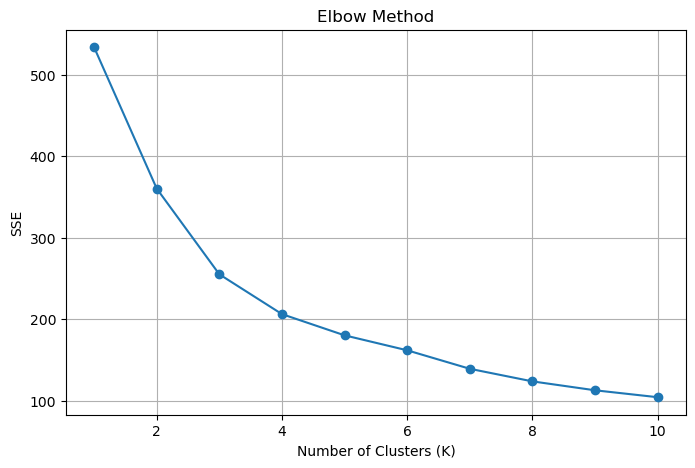

In [51]:
# --- 3. 使用肘部法则确定最佳聚类数 ---
# (此部分代码可直接运行，用于观察)
sse = []
for k in range(1, 11):
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_test.fit(scaled_data)
    sse.append(kmeans_test.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

#### --- 4. 运行KMeans算法并记录时间 ---

In [53]:
# 任务：根据上图的“肘点”，确定最佳的K值
optimal_k = 4

# 记录开始时间
start_time = time.time()

# 任务：使用最佳K值创建KMeans模型
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
# 任务：使用标准化后的数据(scaled_data)进行聚类，并将结果存入'Cluster'列
wine_df['Cluster'] = kmeans.fit_predict(scaled_data)

# 记录结束时间并计算运行时长
end_time = time.time()
run_time = end_time - start_time

D:\software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### --- 5. 分析与输出实验数据 ---
- 讲解：当使用了多个特征，可能直接可视化。因此，我们通过计算每个簇中各个特征的平均值，来理解不同簇的特点。
- 任务：按新生成的聚类标签'Cluster'进行分组，并计算所选特征的均值

In [61]:
features_to_cluster= ['a', 'b','c']
cluster_analysis = wine_df.groupby('Cluster')[features_to_cluster].mean()

print(f"程序运行时间: {run_time:.4f} 秒")
print(f"选择的最佳聚类数 (K): {optimal_k}")
print("\n各簇的特征均值 (聚类中心):\n", cluster_analysis)


程序运行时间: 0.0720 秒
选择的最佳聚类数 (K): 4

各簇的特征均值 (聚类中心):
                  a         b         c
Cluster                               
0        12.489655  1.619655  1.945517
1        13.181591  3.975227  2.429773
2        13.776724  1.831379  2.502414
3        12.188723  1.867447  2.399362


#### 概念回顾与填空：
- 1.数据标准化是聚类分析中的一个重要步骤，我们使用了 __StandardScaler__ 类从 sklearn.preprocessing 库来进行数据的标准化处理，此处理确保了所有特征具有 __0__ 的均值和 __1__ 的方差。
- 2.KMeans聚类算法通过迭代寻找数据的聚类中心，每次迭代中，算法将每个数据点分配给距离最近的聚类中心，然后重新计算这些聚类的 __质心（或均值）__。
- 3.在代码中，我们使用 __fit_predict__ 方法来确定每个数据点所属的聚类。此外，我们还通过访问模型的 _ inertia____ 属性来获取聚类惯性（SSE），这是衡量聚类紧密度的一个指标，其值越 __小 _ 表示聚类效果越好。


#### 结果分析与思考：
- 1.多次运行你的代码（不修改random_state），实验结果是否完全相同？如果把random_state=42这个参数去掉再多次运行，结果会相同吗？这说明了KMeans算法的什么特点？
  - 参考答案: 关于 random_state 和算法特点的问题：多次运行代码（不修改 random_state=42），实验结果是完全相同的。 这是因为 random_state 参数的作用是固定随机数种子。在KMeans算法中，初始的聚类中心是随机选择的，一旦种子被固定，每次“随机”选择的结果都会是一样的。
如果把 random_state=42 这个参数去掉再多次运行，结果很可能不会相同。 这是因为每次运行时，算法都会随机选择一组新的初始聚类中心，不同的初始中心可能会导致算法收敛到不同的局部最优解，从而产生不同的聚类结果。
    这说明了KMeans算法的两个特点：对初始值敏感： 算法的最终结果依赖于初始聚类中心的选择。
不保证全局最优： 算法可能会收敛到一个局部最优解，而不是全局最优解。因此，在实践中，通常会用不同的初始中心多次运行算法，然后选择结果最好的一次。
- 2.聚类数（K值）对实验结果有什么影响？如果选择的K值过大或过小，会对结果造成什么影响？
    - 参考答案 :
        - K值是KMeans算法的核心超参数，它直接决定了数据将被分成多少个簇，对最终结果有决定性的影响。
        - 如果选择的K值过小： 会导致算法将本应属于不同类别的数据点强制合并到一个簇中，使得簇的内部差异过大，无法有效地区分数据类别。这叫做“欠拟合”。
        - 如果选择的K值过大： 会导致算法将本应属于同一个类别的数据点拆分到多个不同的簇中，使得聚类结果过于细碎，失去了对数据宏观结构的概括能力。这叫做“过拟合”。例如，在最极端的情况下，如果K值等于样本数量，那么每个数据点都会自成一类。